## Limpieza de los datos de *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df_feb = pd.read_csv('Data/Madrid/listings0.csv.gz',compression='gzip',low_memory=False)
df_ene = pd.read_csv('Data/Madrid/listings1.csv.gz',compression='gzip',low_memory=False)
df_dic = pd.read_csv('Data/Madrid/listings2.csv.gz',compression='gzip',low_memory=False)
df_nov = pd.read_csv('Data/Madrid/listings3.csv.gz',compression='gzip',low_memory=False)
df_oct = pd.read_csv('Data/Madrid/listings4.csv.gz',compression='gzip',low_memory=False)
df_sep = pd.read_csv('Data/Madrid/listings5.csv.gz',compression='gzip',low_memory=False)
df_ago = pd.read_csv('Data/Madrid/listings6.csv.gz',compression='gzip',low_memory=False)
df_jul = pd.read_csv('Data/Madrid/listings7.csv.gz',compression='gzip',low_memory=False)
df_may = pd.read_csv('Data/Madrid/listings8.csv.gz',compression='gzip',low_memory=False)
df_abr = pd.read_csv('Data/Madrid/listings9.csv.gz',compression='gzip',low_memory=False)



In [3]:
files = [df_feb,df_ene,df_dic,df_nov,df_oct,df_sep,df_ago,df_jul,df_may,df_abr]

df = pd.concat(files,sort=True)

In [4]:
#vemos la estructura de los datos 
df.shape

(176705, 106)

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df[df.calculated_host_listings_count_entire_homes.isin(["Nan"])]

access  accommodates                                          amenities  availability_30  availability_365  availability_60  availability_90  bathrooms       bed_type  bedrooms  beds  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms calendar_last_scraped calendar_updated          cancellation_policy                        city cleaning_fee country country_code                                        description experiences_offered extra_people first_review  guests_included has_availability                                         host_about  host_acceptance_rate host_has_profile_pic    host_id host_identity_verified host_is_superhost  host_listings_count                                      host_location                            host_name    host_neighbourhood                                   host_picture_url  \
0                                                    NaN             2  {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...                7               317               25               46        1.0  Pull-out Sofa       0.0   1.0                               1                                          NaN                                           NaN                                          NaN            2018-12-10            today  strict_14_with_grace_period                      Madrid       $30.00   Spain           ES  Cosy small studio with a nice balcony close to...                none       $35.00   2012-05-07                3                t  Hola! \r\n\r\nWelcome to Madrid! \r\n\r\nPleas...                   NaN                    t      74966                      f                 f                  1.0                                             Espana                               Ismael           Embajadores  https://a0.muscache.com/im/users/74966/profile...   
1      There is fibre optic internet connection for y...             1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...                0               132                0                0        1.0       Real Bed       1.0   1.0                               2                                          NaN                                           NaN                                          NaN            2018-12-11     2 months ago  strict_14_with_grace_period                      Madrid          NaN   Spain           ES  We have a quiet and sunny room with a good vie...                none        $8.00   2014-10-10                1                t  EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...                   NaN                    t      83531                      t                 f                  2.0                              Madrid, Madrid, Spain                                Abdel                Aluche  https://a0.muscache.com/im/users/83531/profile...   
2      Apartment with elevator has a storage room for...             3  {TV,Internet,Wifi,"Air conditioning",Kitchen,E...               17               352               47               77        1.0       Real Bed       0.0   2.0                               2                                          NaN                                           NaN                                          NaN            2018-12-10            today  strict_14_with_grace_period                      Madrid       $30.00   Spain           ES  Studio located 50 meters from Gran Via, next t...                none       $10.00   2014-11-29                2                t  Me encanta tratar a mis clientes, como me gust...                   NaN                    t     101471                      t                 f                  2.0                              Madrid, Madrid, Spain                               Iraido              Malasaña  https://a0.muscache.com/im/pictures/user/233f4...   
3      La disponibilidad de acceso al apartamento es ...             4  {TV,"C

In [6]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

access  accommodates                                          amenities  availability_30  availability_365  availability_60  availability_90  bathrooms  bed_type  bedrooms  beds  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms calendar_last_scraped calendar_updated          cancellation_policy    city cleaning_fee country country_code                                        description experiences_offered extra_people first_review  guests_included has_availability                                         host_about  host_acceptance_rate host_has_profile_pic  host_id host_identity_verified host_is_superhost  host_listings_count             host_location host_name host_neighbourhood                                   host_picture_url host_response_rate  host_response_time  host_since  \
0  Full use of living room, kitchen (with dishwas...             2  {Wifi,"Air conditioning",Kitchen,Elevator,Heat...               30                83               53               83        1.0  Real Bed       1.0   0.0                               1                                          0.0                                           1.0                                          0.0            2019-02-06       5 days ago                     flexible  Madrid        $5.00   Spain           ES  BETTER THAN A HOTEL.Upscale neighboorhood (Met...                none       $15.00   2010-03-14                2                t  Gay couple, heterofriendly, enjoy having guest...                   NaN                    t    13660                      f                 f                  1.0     Madrid, Madrid, Spain     Simon     Hispanoamérica  https://a0.muscache.com/im/users/13660/profile...               100%      within an hour  2009-04-16   
1  There is fibre optic internet connection for y...             1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...                0                 0                0                0        1.0  Real Bed       1.0   1.0                               2                                          0.0                                           2.0                                          0.0            2019-02-06      4 weeks ago  strict_14_with_grace_period  Madrid          NaN   Spain           ES  We have a quiet and sunny room with a good vie...                none        $8.00   2014-10-10                1                t  EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...                   NaN                    t    83531                      t                 f                  2.0     Madrid, Madrid, Spain     Abdel             Aluche  https://a0.muscache.com/im/users/83531/profile...                NaN                 NaN  2010-02-21   
2  La disponibilidad de acceso al apartamento es ...             4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...               18               317               35               56        1.0  Real Bed       2.0   3.0                               1                                          1.0                                           0.0                                          0.0            2019-02-06      2 weeks ago                     moderate  Madrid        $0.00   Spain           ES  Select the Madrid more "cool" : 70 m, 2 bedroo...                none        $0.00   2011-06-02                4                t  Mi mayor pasión es viajar y conocer culturas d...                   NaN                    t   101653                      f                 t                  1.0  Las Rozas, Madrid, Spain     Tenty           Justicia  https://a0.muscache.com/im/users/101653/profil...               100%  within a few hours  2010-03-31   
3                                                NaN             2  {Internet,Wifi,"Wheelchair accessible",Doorman...               29               364               59               89        1.0  Real Bed       

El **primer criterio** utilizado para simplificar la información contenida en la tabla es el de encontrar aquellas columnas prescindibles.

In [7]:
#Comprobamos chequeando la URL que significa cada columna y eliminamos las que son solo de consulta, 

a_borrar_consulta = ['listing_url','host_url']

#campos de texto sin relevancia, variables redundantes o URL`s que no nos sirven para el análisis. 
#Normalmente los campos de texto no vienen predeterminados por AirBnb y por tanto no tienen formato establecido.

a_borrar_texto = ['summary','space','neighborhood_overview','notes'
                     ,'transit','access','interaction','house_rules','host_name']
a_borrar_redundantes = ['scrape_id','calendar_last_scraped','jurisdiction_names','country'
                        ,'country_code','street','market','smart_location','host_location','zipcode','state'
                       ,'neighbourhood']
a_borrar_urls = ['thumbnail_url','picture_url','medium_url','xl_picture_url','host_thumbnail_url',
                 'host_picture_url','host_url','listing_url']

#Las siguientes columnas son eliminadas por el desconocimiento del método de cálculo o por no comprender que significan

a_borrar_desconocidas = ['is_location_exact','maximum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights'
                        ,'minimum_maximum_nights','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
#Las siguientes hacen referencia al método de scrapping o están condicionadas por el momento concreto en el que se hizo

a_borrar_scrapping = ['maximum_nights','minimum_nights','calendar_updated','has_availability']

#Por último, estos requerimientos no son necesarios:

a_borrar_irrelevantes = ['require_guest_profile_picture','require_guest_phone_verification','experiences_offered'
                         ,'host_has_profile_pic']

In [8]:
#Juntamos todas las columnas, las eliminamos y comprobamos cuánto se han reducido
Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
df.drop(Useless,axis=1,inplace=True)
df.shape


(176705, 61)

El **segundo criterio** para reducir las dimensiones es eliminar aquellas columnas que contengan al menos un 30% de nulos, ya que no serán útiles con tanta información perdida.

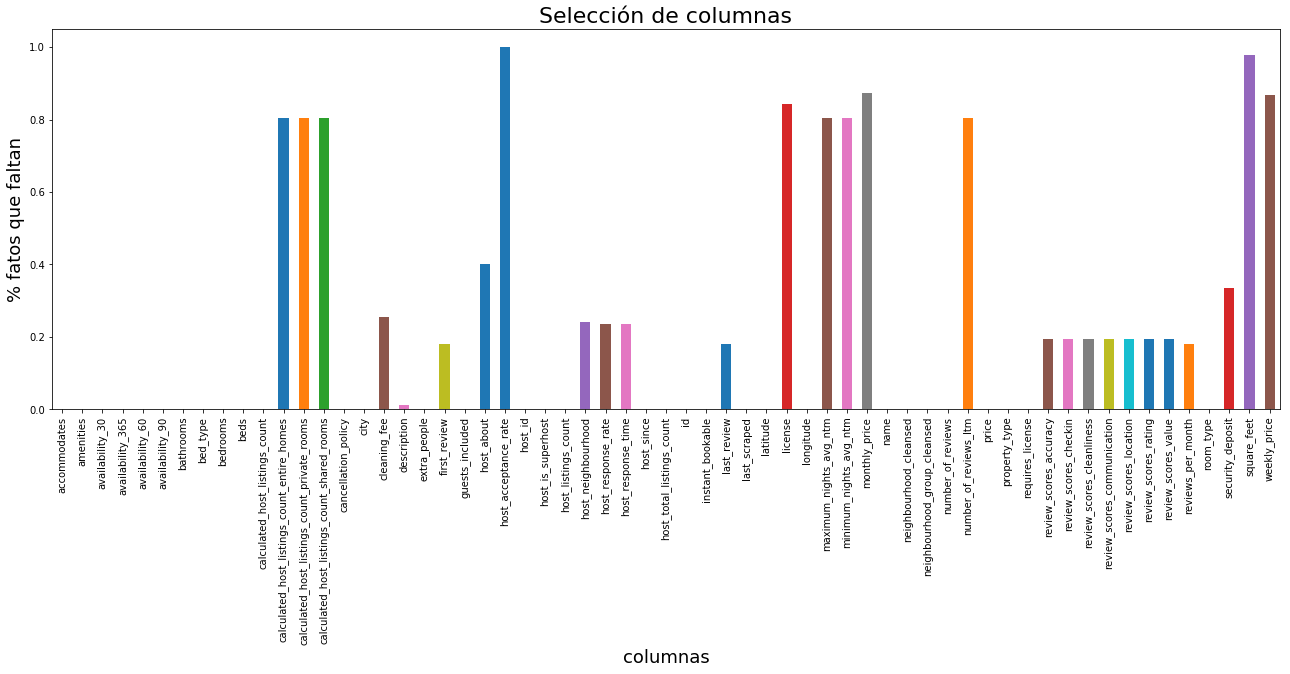

In [9]:
#Representamos gráficamente el % de nulos de las columnas restantes
missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [10]:
nulos = missing.loc[missing > 0.3].index
nulos_lista = list(nulos)
#Dejamos la licencia aunque sea nulo, ya que lo consideramos importante
#Dejamos las siguientes columnas aunque tengan muchos nulos ya que pueden ser importantes para los periodos que están disponibles
nulos_lista.remove('license')
nulos_lista.remove('maximum_nights_avg_ntm')
nulos_lista.remove('minimum_nights_avg_ntm')
nulos_lista.remove('number_of_reviews_ltm')
nulos_lista

['calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_about',
 'host_acceptance_rate',
 'monthly_price',
 'security_deposit',
 'square_feet',
 'weekly_price']

In [11]:
#Tenemos 62 columnas para realizar el análisis, pudiendo ser reducidas en el futuro en caso de ser considerado.
df.drop(nulos_lista, axis = 1, inplace = True)
df.shape

(176705, 52)

In [12]:
#Obtenemos el % de nulos para cada periodo en Madrid, la segunda parte de la función se utiliza
#para eliminar aquellos campos que no se usaban en el momento del scrapping.
def saca_nulos(file):
    try:
        df_month = pd.read_csv(file,compression='gzip',low_memory=False)
        global Useless
        df_month.drop(Useless,axis=1,inplace = True)
        missing = df_month.isnull().sum()/df_month.shape[0]
        nulos_month = missing.loc[missing > 0.3].index
        return list(nulos_month)
    except:
        df_month = pd.read_csv(file,compression='gzip',low_memory=False)
        global a_borrar_desconocidas
        a_borrar_desconocidas = ['is_location_exact','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
        Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
        df_month.drop(Useless,axis=1,inplace = True)
        missing = df_month.isnull().sum()/df_month.shape[0]
        nulos_month = missing.loc[missing > 0.3].index
        return list(nulos_month)


In [13]:
filenames = ['Data/Madrid/listings0.csv.gz','Data/Madrid/listings1.csv.gz',
             'Data/Madrid/listings2.csv.gz','Data/Madrid/listings3.csv.gz',
             'Data/Madrid/listings4.csv.gz','Data/Madrid/listings5.csv.gz',
             'Data/Madrid/listings6.csv.gz','Data/Madrid/listings7.csv.gz',
             'Data/Madrid/listings8.csv.gz','Data/Madrid/listings9.csv.gz']
months = ['ene','dic','oct','sep','ago','jul','may','abr','ene']


In [14]:
lista_nulos_por_periodo = []
for f in filenames:
    a = saca_nulos(f)
    lista_nulos_por_periodo.append(a)


In [15]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

accommodates                                          amenities  availability_30  availability_365  availability_60  availability_90  bathrooms  bed_type  bedrooms  beds  calculated_host_listings_count          cancellation_policy    city cleaning_fee                                        description extra_people first_review  guests_included  host_id host_is_superhost  host_listings_count host_neighbourhood host_response_rate  host_response_time  host_since  host_total_listings_count     id instant_bookable last_review last_scraped   latitude license  longitude  maximum_nights_avg_ntm  minimum_nights_avg_ntm                                               name neighbourhood_cleansed neighbourhood_group_cleansed  number_of_reviews  number_of_reviews_ltm    price property_type requires_license  review_scores_accuracy  review_scores_checkin  review_scores_cleanliness  review_scores_communication  review_scores_location  review_scores_rating  review_scores_value  reviews_per_month  \
0             2  {Wifi,"Air conditioning",Kitchen,Elevator,Heat...               30                83               53               83        1.0  Real Bed       1.0   0.0                               1                     flexible  Madrid        $5.00  BETTER THAN A HOTEL.Upscale neighboorhood (Met...       $15.00   2010-03-14                2    13660                 f                  1.0     Hispanoamérica               100%      within an hour  2009-04-16                        1.0   6369                f  2019-01-18   2019-02-06  40.456283     NaN  -3.677625                    30.0                     1.0  Rooftop terrace room with ensuite bathroom, Airc.         Hispanoamérica                    Chamartín                 60                    1.0   $70.00     Apartment                t                    10.0                    9.0                       10.0                         10.0                     9.0                  98.0                 10.0               0.55   
1             1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...                0                 0                0                0        1.0  Real Bed       1.0   1.0                               2  strict_14_with_grace_period  Madrid          NaN  We have a quiet and sunny room with a good vie...        $8.00   2014-10-10                1    83531                 f                  2.0             Aluche                NaN                 NaN  2010-02-21                        2.0  21853                f  2018-07-15   2019-02-06  40.403410     NaN  -3.740842                    40.0                     4.0                               Bright and airy room               Cármenes                       Latina                 33                    7.0   $17.00     Apartment                t                     9.0                   10.0                        9.0                         10.0                     8.0                  92.0                  9.0               0.63   
2             4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...               18               317               35               56        1.0  Real Bed       2.0   3.0                               1                     moderate  Madrid        $0.00  Select the Madrid more "cool" : 70 m, 2 bedroo...        $0.00   2011-06-02                4   101653                 t                  1.0           Justicia               100%  within a few hours  2010-03-31                        1.0  24836                f  2019-01-04   2019-02-06  40.419951  VT-296  -3.697637                  1125.0                     3.0                     Select the Madrid more "cool".               Justicia                       Centro                 52                   13.0  $115.00     Apartment                t                    10.0                   10.0                       10.0                         10.0                    10.0                  98.0                 10.0               0.56   
3          

In [16]:
#Pasamos las fechas de formato texto a fecha
df.last_scraped = pd.to_datetime(df.last_scraped)
df.host_since = pd.to_datetime(df.host_since)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)
df.last_scraped.dtype

dtype('<M8[ns]')

In [17]:
df.shape

(176705, 52)

In [18]:
#Reemplazamos valores [t,f] por [True, False]

df.host_is_superhost = df.host_is_superhost.str.replace("f","0")
df.host_is_superhost = df.host_is_superhost.str.replace("t","1")




In [19]:
df.requires_license = df.requires_license.str.replace("f","0")
df.requires_license = df.requires_license.str.replace("t","1")

In [20]:
df.instant_bookable = df.instant_bookable.str.replace("f","0")
df.instant_bookable = df.instant_bookable.str.replace("t","1")

In [21]:
df.instant_bookable.head()

0    0
1    0
2    0
3    0
4    0
Name: instant_bookable, dtype: object

In [22]:
df.host_is_superhost = df.host_is_superhost.astype(bool)
df.requires_license = df.requires_license.astype(bool)
df.instant_bookable = df.instant_bookable.astype(bool)

In [23]:
#Comprobamos que está en booleano
df.requires_license.dtype

dtype('bool')

### Las políticas de cancelación del AirBnb son las siguientes:

* Flexible: Si la cancelación se hace con al menos 24h de antelación el huésped tiene derecho a una devolución completa.  Si es con menos de 24h la primera noche no será reembolsada, siendo el resto de los días reembolsados.

* Moderate: La cancelación se debe hacer o bien 48h después de la reserva o 5 días antes de la llegada para obtener reembolso completo.  Si se cancela con menos de 5 días de antelación se reembolsará el *50%* de las noches sin contar la primera.

* Strict_14_with_grace_period: La cancelación se debe hacer o bien 48h después de la reserva o *14* días antes de la llegada para obtener reembolso completo.  Para obtener el 50% del reembolso se debe cancelar con al menos 7 dias completos antes del día y hora local.  Con menos de 7 dias no hay reembolso.

* Super_strict_30: Si la cancelación se produce con al menos 30 días se reembolsa el 50%.

* Super_strict_60: Si la cancelación se produce con al menos 60 días se reembolsa el 50%.

* Long_term: Se aplica a huéspedes que están 28 días o más. El primer mes lo cobra el host sea cual sea la cancelación.

In [24]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    59166
moderate                       56135
flexible                       53939
strict                          5920
super_strict_30                 1362
super_strict_60                  182
flexible_new                       1
Name: cancellation_policy, dtype: int64

In [25]:
#Pasamos a categórica con cinco y tres niveles respectivamente
df.cancellation_policy = pd.Categorical(df.cancellation_policy, ['flexible','moderate'
                                                                         ,'strict_14_with_grace_period',
                                                                        'super_strict_30',
                                                                         'super_strict_60'],ordered=True)

df.room_type = pd.Categorical(df.room_type, ['Entire home/apt','Private room','Shared room'],ordered=True)

In [26]:
df.head()

accommodates                                          amenities  availability_30  availability_365  availability_60  availability_90  bathrooms  bed_type  bedrooms  beds  calculated_host_listings_count          cancellation_policy    city cleaning_fee                                        description extra_people first_review  guests_included  host_id  host_is_superhost  host_listings_count host_neighbourhood host_response_rate  host_response_time host_since  host_total_listings_count     id  instant_bookable last_review last_scraped   latitude license  longitude  maximum_nights_avg_ntm  minimum_nights_avg_ntm                                               name neighbourhood_cleansed neighbourhood_group_cleansed  number_of_reviews  number_of_reviews_ltm    price property_type  requires_license  review_scores_accuracy  review_scores_checkin  review_scores_cleanliness  review_scores_communication  review_scores_location  review_scores_rating  review_scores_value  reviews_per_month  \
0             2  {Wifi,"Air conditioning",Kitchen,Elevator,Heat...               30                83               53               83        1.0  Real Bed       1.0   0.0                               1                     flexible  Madrid        $5.00  BETTER THAN A HOTEL.Upscale neighboorhood (Met...       $15.00   2010-03-14                2    13660               True                  1.0     Hispanoamérica               100%      within an hour 2009-04-16                        1.0   6369              True  2019-01-18   2019-02-06  40.456283     NaN  -3.677625                    30.0                     1.0  Rooftop terrace room with ensuite bathroom, Airc.         Hispanoamérica                    Chamartín                 60                    1.0   $70.00     Apartment              True                    10.0                    9.0                       10.0                         10.0                     9.0                  98.0                 10.0               0.55   
1             1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...                0                 0                0                0        1.0  Real Bed       1.0   1.0                               2  strict_14_with_grace_period  Madrid          NaN  We have a quiet and sunny room with a good vie...        $8.00   2014-10-10                1    83531               True                  2.0             Aluche                NaN                 NaN 2010-02-21                        2.0  21853              True  2018-07-15   2019-02-06  40.403410     NaN  -3.740842                    40.0                     4.0                               Bright and airy room               Cármenes                       Latina                 33                    7.0   $17.00     Apartment              True                     9.0                   10.0                        9.0                         10.0                     8.0                  92.0                  9.0               0.63   
2             4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...               18               317               35               56        1.0  Real Bed       2.0   3.0                               1                     moderate  Madrid        $0.00  Select the Madrid more "cool" : 70 m, 2 bedroo...        $0.00   2011-06-02                4   101653               True                  1.0           Justicia               100%  within a few hours 2010-03-31                        1.0  24836              True  2019-01-04   2019-02-06  40.419951  VT-296  -3.697637                  1125.0                     3.0                     Select the Madrid more "cool".               Justicia                       Centro                 52                   13.0  $115.00     Apartment              True                    10.0                   10.0                       10.0                         10.0                    10.0                  98.0                 10.0               0.56   
3  

In [27]:
df.shape

(176705, 52)

In [28]:
df.amenities.value_counts()

{TV,Wifi,"Air conditioning",Kitchen,Elevator,Heating,Washer,Essentials,"Hair dryer",Iron}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [29]:
list(df.columns)

['accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'description',
 'extra_people',
 'first_review',
 'guests_included',
 'host_id',
 'host_is_superhost',
 'host_listings_count',
 'host_neighbourhood',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_total_listings_count',
 'id',
 'instant_bookable',
 'last_review',
 'last_scraped',
 'latitude',
 'license',
 'longitude',
 'maximum_nights_avg_ntm',
 'minimum_nights_avg_ntm',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'price',
 'property_type',
 'requires_license',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 

In [30]:
#Buscamos si el valor centro de City se corresponde con Madrid para admitirlo como válido
df.loc[df.city == "Centro"]

accommodates                                          amenities  availability_30  availability_365  availability_60  availability_90  bathrooms  bed_type  bedrooms  beds  calculated_host_listings_count cancellation_policy    city cleaning_fee                                        description extra_people first_review  guests_included    host_id  host_is_superhost  host_listings_count host_neighbourhood host_response_rate  host_response_time host_since  host_total_listings_count        id  instant_bookable last_review last_scraped   latitude license  longitude  maximum_nights_avg_ntm  minimum_nights_avg_ntm                                               name neighbourhood_cleansed neighbourhood_group_cleansed  number_of_reviews  number_of_reviews_ltm   price       property_type  requires_license  review_scores_accuracy  review_scores_checkin  review_scores_cleanliness  review_scores_communication  review_scores_location  review_scores_rating  review_scores_value  \
1115              2  {TV,Wifi,"Air conditioning",Kitchen,Elevator,H...               23               358               53               83        1.0     Futon       2.0   2.0                               2            moderate  Centro       $30.00  One bedroom + Private Bathroom. Full Comfort. ...       $30.00   2014-04-29                1     132052               True                  2.0             Cortes               100%  within a few hours 2010-05-25                        2.0   2847041              True  2018-12-09   2019-02-06  40.411334     NaN  -3.694809                   180.0                     2.0                    El Limonero de Las Letras ♡ ♥ ♡                 Cortes                       Centro                 37                    9.0  $70.00           Apartment              True                     9.0                    9.0                       10.0                          9.0                    10.0                  93.0                  9.0   
15034             1  {TV,Internet,Wifi,"Air conditioning",Elevator,...               17               343               44               74        1.0  Real Bed       1.0   NaN                              28            flexible  Centro          NaN  Nuestras habitaciones de lujo en Gran vía con ...       $30.00          NaT                1  215986813               True                 28.0                NaN                50%        within a day 2018-09-18                       28.0  29329361              True         NaT   2019-02-06  40.422076     NaN  -3.710507                  1125.0                     1.0           Habitación Superior Doble Uso Individual                Palacio                       Centro                  0                    0.0  $75.00              Hostel              True                     NaN                    NaN                        NaN                          NaN                     NaN                   NaN                  NaN   
15035             2  {TV,Internet,Wifi,Breakfast,Elevator,Heating,S...               21               344               47               74        1.0  Real Bed       1.0   NaN                              28            flexible  Centro          NaN  Nuestras habitaciones de lujo en Gran vía con ...       $30.00          NaT                2  215986813               True                 28.0                NaN                50%        within a day 2018-09-18                       28.0  29329365              True         NaT   2019-02-06  40.421756     NaN  -3.710421                  1125.0                     1.0          Habitación Doble 1 o 2 camas con Desayuno                Palacio                       Centro                  0                    0.0  $75.00              Hostel              True                     NaN                    NaN                        NaN                          NaN                     NaN                   NaN                  NaN   
15036             1  {TV,Internet,"Air conditioning",Elevator,H

In [31]:
#Seleccionamos aquellos valores para los que validaremos que pertenecen a Madrid
df.city.value_counts()
df = df[df.city.isin(["Madrid","MADRID","Centro","Madrid Center",
"Madrid, Comunidad de Madrid, ES","madrid"," Madrid"])]

In [32]:
cities = list(df.city.value_counts().index)

for x in cities:
    df.city = df.city.str.replace(x,"Madrid")

In [33]:
#Comprobamos que los valores se han sustituido correctamente
df.city.value_counts()

Madrid    176226
Name: city, dtype: int64

In [36]:
#Comprobamos que la columna df
df.room_type.value_counts()

Entire home/apt    112249
Private room        61875
Shared room          2102
Name: room_type, dtype: int64